In [ ]:
import sys
import time
from IPython.display import clear_output

line = "your message"
for i in range(1000):
    if i % 1 == 0:
        clear_output()
        print(i)
    time.sleep(0.1)

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    time.sleep(0.1)
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [ ]:
%load_ext autoreload
%autoreload 2

print(np.random.randint(50))

# Query and visualize influx data

In [ ]:
import sys
!{sys.executable} -m pip install influxdb

In [ ]:
influx_db_private_ip = "172.31.41.46"
db = "telegraf-sm"

from influxdb import InfluxDBClient
client = InfluxDBClient(host=influx_db_private_ip, database=db)

In [45]:
import datetime
def query():
    results = []
    result = client.query("SELECT * FROM \"mem\" WHERE \"user\" =~ /armand/ AND \"host\" =~ /algo-1/ ORDER BY time DESC LIMIT 100;")
    
    for r in result['mem']:
        t = datetime.datetime.strptime(r['time'], '%Y-%m-%dT%H:%M:%S.%fZ')
        pruned_r = {
            'time': t,
            'free': r['free'],
            'used': r['used']
        }
        results.append(pruned_r)
    return results

results = query()

In [46]:
for r in results:
    print(r)

{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 181000), 'free': 464163643392, 'used': 30824456192}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 171000), 'free': 464159748096, 'used': 30828351488}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 161000), 'free': 464161968128, 'used': 30826131456}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 151000), 'free': 464162447360, 'used': 30825652224}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 141000), 'free': 464164261888, 'used': 30823837696}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 131000), 'free': 464163074048, 'used': 30825025536}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 121000), 'free': 464162844672, 'used': 30825254912}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 111000), 'free': 464163475456, 'used': 30824624128}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 101000), 'free': 464163086336, 'used': 30825013248}
{'time': datetime.datetime(2019, 6, 24, 22, 53, 25, 91000), 'fre

<IPython.core.display.Javascript object>


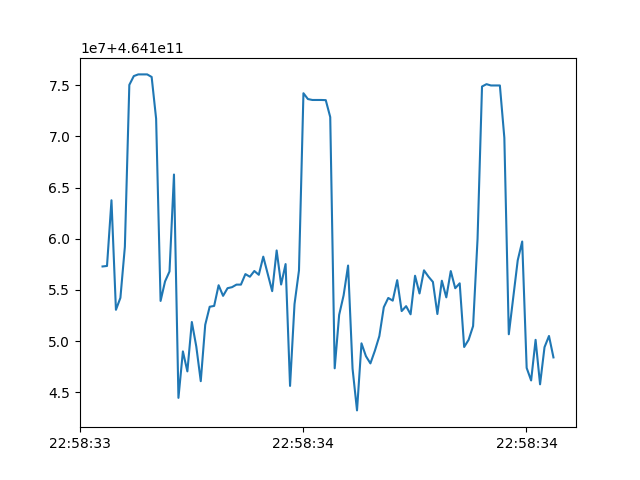

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time



fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100_000_000):
    results = query()
#     print("query_complete")
    timestamps = [r['time'] for r in results]
    dependent_var = [r['free'] for r in results]
    time.sleep(0.1)
    ax.clear()
    ax.plot(timestamps, dependent_var)
    fig.canvas.draw()